In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from function import visualize_column as dv
from sklearn.ensemble import RandomForestClassifier  # for classification
from sklearn.metrics import accuracy_score           # for classification


In [2]:
# Load Data
Verizon_data = 'Telco_Churn_Data.csv'

df = pd.read_csv(Verizon_data)

df.head(15)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [3]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [4]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
# Get statistics for columns
df.describe(include = 'all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7042,7040,7042,7041,...,7041,7041,7040,7043,7041,7042,7041,7042.000000,7042,7042
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,4,2,4,NaN,6530,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6360,3388,3095,3498,...,3094,3472,2808,2785,3870,4170,2364,NaN,11,5173
mean,NaN,NaN,0.162147,NaN,NaN,32.683516,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.756774,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,28.998589,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.089352,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,-50.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


In [6]:
# Checking for null values
df.isnull().values.any()

True

In [7]:
# Checking what columns are missing values
nan_count = np.sum(df.isnull(), axis = 0)
nan_count

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        1
MultipleLines       3
InternetService     1
OnlineSecurity      2
OnlineBackup        0
DeviceProtection    2
TechSupport         2
StreamingTV         3
StreamingMovies     0
Contract            2
PaperlessBilling    1
PaymentMethod       2
MonthlyCharges      1
TotalCharges        1
Churn               1
dtype: int64

In [8]:
# Finding indicies with missing row values
bool_df = df.isnull()
row_has_nan = bool_df.any (axis=1)
rows_with_nan = df[row_has_nan].index
rows_with_nan

Int64Index([1375, 1397, 1401, 1411, 1417, 3995, 4666, 4668, 4670, 6239], dtype='int64')

In [9]:
# Dropping those rows
df = df.drop(df.index[rows_with_nan])

In [10]:
nan_count = np.sum(df.isnull(), axis = 0)
nan_count

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
# Checking results of previous code
nan_count = np.sum(df.isnull(), axis = 0)
nan_count

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
# New shape!
df.shape

(7033, 21)

In [13]:
# Testing what one hot encoding each column will do...we get over 10,000 columns
pd.get_dummies(df).shape

(7033, 13601)

In [14]:
# Convert column to either yes or no
df['MultipleLines'] = df['MultipleLines'].replace({'No phone service': 'No'})
df['OnlineSecurity'] = df['OnlineSecurity'].replace({'No internet service': 'No'})
df['OnlineBackup'] = df['OnlineBackup'].replace({'No internet service': 'No'})
df['DeviceProtection'] = df['DeviceProtection'].replace({'No internet service': 'No'})
df['TechSupport'] = df['TechSupport'].replace({'No internet service': 'No'})
df['StreamingTV'] = df['StreamingTV'].replace({'No internet service': 'No'})
df['StreamingMovies'] = df['StreamingMovies'].replace({'No internet service': 'No'})
df['InternetService'] = df['InternetService'].replace({'DSL': 'Yes', 'Fiber optic' : 'Yes'})
df['PaymentMethod'] = df['PaymentMethod'].replace({'Bank transfer (automatic)': 'Yes', 'Credit card (automatic)' : 'Yes', 'Electronic check' : 'No', 'Mailed check' : 'No'})
# Renaming Payment Method to Automatic Payment (1)
df = df.rename(columns={'PaymentMethod': 'AutomaticPayment'})

df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,AutomaticPayment,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,Yes,No,...,No,No,No,No,Month-to-month,Yes,No,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,Yes,Yes,...,Yes,No,No,No,One year,No,No,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,Yes,Yes,...,No,No,No,No,Month-to-month,Yes,No,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,Yes,Yes,...,Yes,Yes,No,No,One year,No,Yes,42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Yes,No,...,No,No,No,No,Month-to-month,Yes,No,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,Yes,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,No,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Yes,No,...,Yes,No,Yes,Yes,One year,Yes,Yes,103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No,Yes,Yes,...,No,No,No,No,Month-to-month,Yes,No,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Yes,No,...,No,No,No,No,Month-to-month,Yes,No,74.40,306.6,Yes


In [15]:
# Male 1 and Female 0
df['gender'] = df['gender'].replace({'Male': 1, 'Female': 0})
# Yes 1 and No 0
df['Partner'] = df['Partner'].replace({'Yes': 1, 'No': 0})
df['Dependents'] = df['Dependents'].replace({'Yes': 1, 'No': 0})
df['PhoneService'] = df['PhoneService'].replace({'Yes': 1, 'No': 0})
df['MultipleLines'] = df['MultipleLines'].replace({'Yes': 1, 'No': 0})
df['OnlineSecurity'] = df['OnlineSecurity'].replace({'Yes': 1, 'No': 0})
df['OnlineBackup'] = df['OnlineBackup'].replace({'Yes': 1, 'No': 0})
df['DeviceProtection'] = df['DeviceProtection'].replace({'Yes': 1, 'No': 0})
df['TechSupport'] = df['TechSupport'].replace({'Yes': 1, 'No': 0})
df['StreamingTV'] = df['StreamingTV'].replace({'Yes': 1, 'No': 0})
df['StreamingMovies'] = df['StreamingMovies'].replace({'Yes': 1, 'No': 0})
df['InternetService'] = df['InternetService'].replace({'Yes': 1, 'No': 0})
df['PaperlessBilling'] = df['PaperlessBilling'].replace({'Yes': 1, 'No': 0})
df['AutomaticPayment'] = df['AutomaticPayment'].replace({'Yes': 1, 'No': 0})
df['Churn'] = df['Churn'].replace({'Yes': 1, 'No': 0})

df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,AutomaticPayment,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,0,1,0,...,0,0,0,0,Month-to-month,1,0,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,1,1,...,1,0,0,0,One year,0,0,56.95,1889.5,0
2,3668-QPYBK,1,0,0,0,2,1,0,1,1,...,0,0,0,0,Month-to-month,1,0,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,0,1,1,...,1,1,0,0,One year,0,1,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,...,0,0,0,0,Month-to-month,1,0,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,1,1,24,1,1,1,1,...,1,1,1,1,One year,1,0,84.80,1990.5,0
7039,2234-XADUH,0,0,1,1,72,1,1,1,0,...,1,0,1,1,One year,1,1,103.20,7362.9,0
7040,4801-JZAZL,0,0,1,1,11,0,0,1,1,...,0,0,0,0,Month-to-month,1,0,29.60,346.45,0
7041,8361-LTMKD,1,1,1,0,4,1,1,1,0,...,0,0,0,0,Month-to-month,1,0,74.40,306.6,1


In [16]:
# Checking how our data types look
df.dtypes

customerID           object
gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract             object
PaperlessBilling      int64
AutomaticPayment      int64
MonthlyCharges      float64
TotalCharges         object
Churn                 int64
dtype: object

In [17]:
# CONTRACT

In [18]:
# Checking how many unique values in column (there are three important values)
unique_values = df['Contract'].unique()
value_counts = df['Contract'].value_counts()

print(unique_values, value_counts)

['Month-to-month' 'One year' 'Two year' '1'] Month-to-month    3864
Two year          1693
One year          1472
1                    4
Name: Contract, dtype: int64


In [19]:
#Group 1 and "One year" together
df['Contract'] = df['Contract'].replace({"1": "One year"})

In [20]:
# one hot encoding columns
df = pd.get_dummies(df, columns=['Contract'])
df.shape

(7033, 23)

In [21]:
# Checking new dtypes!
df.dtypes

customerID                  object
gender                       int64
SeniorCitizen                int64
Partner                      int64
Dependents                   int64
tenure                       int64
PhoneService                 int64
MultipleLines                int64
InternetService              int64
OnlineSecurity               int64
OnlineBackup                 int64
DeviceProtection             int64
TechSupport                  int64
StreamingTV                  int64
StreamingMovies              int64
PaperlessBilling             int64
AutomaticPayment             int64
MonthlyCharges             float64
TotalCharges                object
Churn                        int64
Contract_Month-to-month      uint8
Contract_One year            uint8
Contract_Two year            uint8
dtype: object

In [22]:
# TENURE

In [23]:
# inspecting tenure
unique_values = df['tenure'].unique()
value_counts = df['tenure'].value_counts()

print(unique_values, value_counts)

[   1   34    2   45    8   22   10   28   62   13   16   58   49   25
   69   52   71   21   12   30   47   72   17   27    5   46   11   70
   63   43   15   60   18   66    9    3   31   50   64   56    7   42
   35   48   29   65   38   68   32   55   37   36   41    6    4   33
   67   23   57   61   14   20   53   40   59   24   44   19   54   51
   26    0   39 1000  300  -50  500  700]  1       613
 72      361
 2       237
 3       200
 4       174
        ... 
 1000      1
 300       1
-50        1
 500       1
 700       1
Name: tenure, Length: 78, dtype: int64


In [24]:
# Statistics on Total Charges
maximum_T = df['tenure'].max()
minimum_T = df['tenure'].min()
data_range_T = maximum_T - minimum_T
average_T = df['tenure'].mean()
std_deviation_T = df['tenure'].std()
print(f"Maximum: {maximum_T}")
print(f"Minimum: {minimum_T}")
print(f"Range: {data_range_T}")
print(f"Average: {average_T}")
print(f"Standard Deviation: {std_deviation_T}")

Maximum: 1000
Minimum: -50
Range: 1050
Average: 32.69202331864069
Standard Deviation: 29.00777847338151


In [25]:
# Checking if the disparity in tenure is corrolated to monthly contracts
comp_columns = df[['tenure', 'Contract_Month-to-month']]
comp_columns

,tenure,Contract_Month-to-month
0,1,1
1,34,0
2,2,1
3,45,0
4,2,1
...,...,...
7038,24,0
7039,72,0
7040,11,1
7041,4,1


In [26]:
# Checking how many columns are higher than 120
threshold = 120
selected_rows = df[df['tenure'] > threshold]
selected_rows

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,PaperlessBilling,AutomaticPayment,MonthlyCharges,TotalCharges,Churn,Contract_Month-to-month,Contract_One year,Contract_Two year
1482,9290-SHCMB,0,1,0,0,1000,1,0,1,0,...,1,1,1,0,96.85,1235.55,0,1,0,0
1604,6265-SXWBU,1,0,1,1,300,1,1,1,0,...,1,0,0,1,95.75,6511.25,0,0,1,0
4612,6723-CEGQI,0,0,0,1,500,0,0,1,0,...,1,0,0,0,45.25,2933.95,0,0,0,1
5904,9402-CXWPL,0,0,0,0,700,1,1,1,0,...,1,1,0,0,98.90,6838.6,0,0,1,0


In [27]:
# scaling tenure between 12 and 140
tenure_min = 12
tenure_max = 120
scaler = MinMaxScaler(feature_range=(tenure_min, tenure_max))

df['scaledtenure'] = scaler.fit_transform(df[['tenure']])

print("Original DataFrame:")
print(df['tenure'])

print("\nScaled DataFrame:")
print(df['scaledtenure'])

Original DataFrame:
0        1
1       34
2        2
3       45
4        2
        ..
7038    24
7039    72
7040    11
7041     4
7042    66
Name: tenure, Length: 7033, dtype: int64

Scaled DataFrame:
0       17.245714
1       20.640000
2       17.348571
3       21.771429
4       17.348571
          ...    
7038    19.611429
7039    24.548571
7040    18.274286
7041    17.554286
7042    23.931429
Name: scaledtenure, Length: 7033, dtype: float64


In [28]:
# Statistics on scaled tenure
maximum_ST = df['scaledtenure'].max()
minimum_ST = df['scaledtenure'].min()
data_range_ST = maximum_ST - minimum_ST
average_ST = df['scaledtenure'].mean()
std_deviation_ST = df['scaledtenure'].std()
print(f"Maximum: {maximum_ST}")
print(f"Minimum: {minimum_ST}")
print(f"Range: {data_range_ST}")
print(f"Average: {average_ST}")
print(f"Standard Deviation: {std_deviation_ST}")

Maximum: 120.0
Minimum: 12.0
Range: 108.0
Average: 20.505465255631616
Standard Deviation: 2.983657214404955


In [29]:
# inspecting scaled tenure as an integer (numbers are very low and lots of disparity)
unique_values = df['scaledtenure'].unique()
value_counts = df['scaledtenure'].value_counts()

print(unique_values, value_counts)

[ 17.24571429  20.64        17.34857143  21.77142857  17.96571429
  19.40571429  18.17142857  20.02285714  23.52        18.48
  18.78857143  23.10857143  22.18285714  19.71428571  24.24
  22.49142857  24.44571429  19.30285714  18.37714286  20.22857143
  21.97714286  24.54857143  18.89142857  19.92        17.65714286
  21.87428571  18.27428571  24.34285714  23.62285714  21.56571429
  18.68571429  23.31428571  18.99428571  23.93142857  18.06857143
  17.45142857  20.33142857  22.28571429  23.72571429  22.90285714
  17.86285714  21.46285714  20.74285714  22.08        20.12571429
  23.82857143  21.05142857  24.13714286  20.43428571  22.8
  20.94857143  20.84571429  21.36        17.76        17.55428571
  20.53714286  24.03428571  19.50857143  23.00571429  23.41714286
  18.58285714  19.2         22.59428571  21.25714286  23.21142857
  19.61142857  21.66857143  19.09714286  22.69714286  22.38857143
  19.81714286  17.14285714  21.15428571 120.          48.
  12.          68.57142857  89.142857

In [30]:
# Converting scaled tenure to integer
# df['scaledtenure'] = df['scaledtenure'].astype(int)

In [31]:
# MONTHLY CHARGES

In [32]:
# Inspecting monthly charges
unique_values = df['MonthlyCharges'].unique()
value_counts = df['MonthlyCharges'].value_counts()

print(unique_values, value_counts)

[29.85 56.95 53.85 ... 63.1  44.2  78.7 ] 20.05     61
19.90     44
19.95     44
19.85     44
19.70     43
          ..
23.65      1
114.70     1
87.80      1
43.65      1
78.70      1
Name: MonthlyCharges, Length: 1585, dtype: int64


In [33]:
# Inspecting monthly charges
unique_values = df['Churn'].unique()
value_counts = df['Churn'].value_counts()

print(unique_values, value_counts)

[0 1] 0    5166
1    1867
Name: Churn, dtype: int64


In [34]:
# Statistics on Monthly Charges
maximum_MC = df['MonthlyCharges'].max()
minimum_MC = df['MonthlyCharges'].min()
data_range_MC = maximum_MC - minimum_MC
average_MC = df['MonthlyCharges'].mean()
std_deviation_MC = df['MonthlyCharges'].std()
print(f"Maximum: {maximum_MC}")
print(f"Minimum: {minimum_MC}")
print(f"Range: {data_range_MC}")
print(f"Average: {average_MC}")
print(f"Standard Deviation: {std_deviation_MC}")

Maximum: 118.75
Minimum: 18.25
Range: 100.5
Average: 64.76227072373098
Standard Deviation: 30.089196044052716


In [35]:
# These statistics look alright! Once we start modeling we may have to penalize some of the higher values
# using regularization techniques!

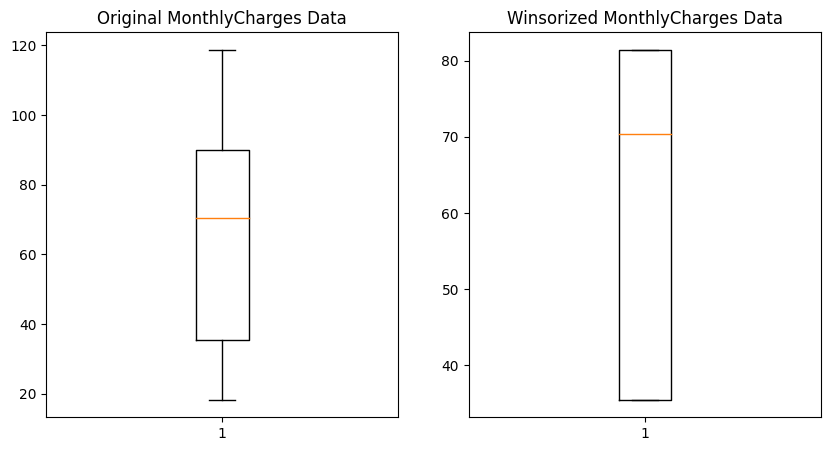

Original Monthly Charges Data Summary Statistics:
 count    7033.000000
mean       64.762271
std        30.089196
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

Winsorized Monthly Charges Data Summary Statistics:
 count    7033.000000
mean       62.766583
std        19.291490
min        35.500000
25%        35.500000
50%        70.350000
75%        81.440000
max        81.440000
Name: winsorized_MonthlyCharges, dtype: float64


In [36]:
# Winzorizing Monthly Charges between 18 (Lowest value) and 65 (Closer to the average)
# This may not be necessary
lower_percentile = 25
upper_percentile = 65

# Calculating the threshold values
lower_threshold = np.percentile(df['MonthlyCharges'], lower_percentile)
upper_threshold = np.percentile(df['MonthlyCharges'], upper_percentile)

# Winsorizing the data
df['winsorized_MonthlyCharges'] = np.clip(df['MonthlyCharges'], lower_threshold, upper_threshold)

# Comparing summary statistics
original_stats_MC = df['MonthlyCharges'].describe()
winsorized_stats_MC = df['winsorized_MonthlyCharges'].describe()

# Creating box plots
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.boxplot(df['MonthlyCharges'])
plt.title('Original MonthlyCharges Data')
plt.subplot(1, 2, 2)
plt.boxplot(df['winsorized_MonthlyCharges'])
plt.title('Winsorized MonthlyCharges Data')
plt.show()

print("Original Monthly Charges Data Summary Statistics:\n", original_stats_MC)
print("\nWinsorized Monthly Charges Data Summary Statistics:\n", winsorized_stats_MC)

In [37]:
# Inspecting problem with Total charges
unique_values = df['TotalCharges'].unique().__array__
value_counts = df['TotalCharges'].value_counts()

print(unique_values, value_counts)

<built-in method __array__ of numpy.ndarray object at 0x7c1470d35f50> 20.2      11
          11
19.75      9
19.9       8
20.05      8
          ..
2117.2     1
203.95     1
6849.4     1
692.35     1
6844.5     1
Name: TotalCharges, Length: 6521, dtype: int64


In [38]:
# Statistics on Total Charges (Had to comment out some of the code because of errors)
maximum_TC = df['TotalCharges'].max()
minimum_TC = df['TotalCharges'].min()
# data_range_TC = maximum_TC - minimum_TC
# average_TC = df['TotalCharges'].mean()
# std_deviation_TC = df['TotalCharges'].std()
print(f"Maximum: {maximum_TC}")
print(f"Minimum: {minimum_TC}")
#print(f"Range: {data_range_TC}")
#print(f"Average: {average_TC}")
#print(f"Standard Deviation: {std_deviation_TC}")

Maximum: 999.9
Minimum:  


In [39]:
# Identifying null or " " values in Total charges
df['TotalCharges'].isna().sum()
min_price = df['TotalCharges'].min()
min_price

' '

In [40]:
# Total charges has dtype object so by converting the rows with non-numeric values to NAN we can drop only the necessary rows
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
# Dropping all the new NAN values
df.dropna(subset=['TotalCharges'], inplace=True)
# Inpsecting the new TotalCharges column with a float value
df['TotalCharges'].describe()

count    7022.000000
mean     2284.121981
std      2266.972770
min        18.800000
25%       401.350000
50%      1397.950000
75%      3799.837500
max      8684.800000
Name: TotalCharges, dtype: float64

In [41]:
# Statistics on Total Charges
maximum_TC = df['TotalCharges'].max()
minimum_TC = df['TotalCharges'].min()
data_range_TC = maximum_TC - minimum_TC
average_TC = df['TotalCharges'].mean()
std_deviation_TC = df['TotalCharges'].std()
print(f"Maximum: {maximum_TC}")
print(f"Minimum: {minimum_TC}")
print(f"Range: {data_range_TC}")
print(f"Average: {average_TC}")
print(f"Standard Deviation: {std_deviation_TC}")

Maximum: 8684.8
Minimum: 18.8
Range: 8666.0
Average: 2284.1219809171175
Standard Deviation: 2266.972769888514


In [42]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
       'AutomaticPayment', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'scaledtenure', 'winsorized_MonthlyCharges'],
      dtype='object')

In [43]:
summary_stats = df[['MonthlyCharges', 'winsorized_MonthlyCharges', 'TotalCharges']].describe()
summary_stats

,MonthlyCharges,winsorized_MonthlyCharges,TotalCharges
count,7022.000000,7022.000000,7022.000000
mean,64.798839,62.788334,2284.121981
std,30.085115,19.287947,2266.972770
min,18.250000,35.500000,18.800000
25%,35.612500,35.612500,401.350000
50%,70.350000,70.350000,1397.950000
75%,89.850000,81.440000,3799.837500
max,118.750000,81.440000,8684.800000


In [44]:
# Inspecting problem with Total charges
unique_values = df['TotalCharges'].unique().__array__
value_counts = df['TotalCharges'].value_counts()

print(unique_values, value_counts)

<built-in method __array__ of numpy.ndarray object at 0x7c1470ac5950> 20.20      11
19.75       9
19.90       8
19.65       8
20.05       8
           ..
2117.20     1
203.95      1
6849.40     1
692.35      1
6844.50     1
Name: TotalCharges, Length: 6520, dtype: int64


In [45]:
# Clearly some outliers, big difference between 75% and max charges😬
# But there are too many columns to just remove them

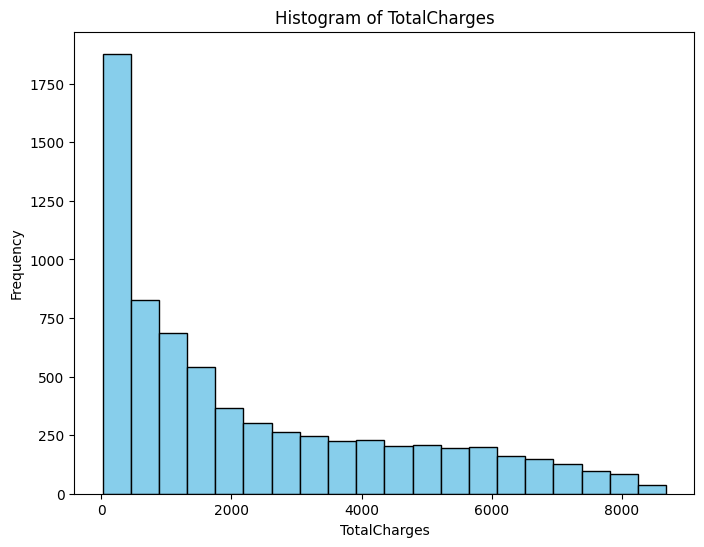

In [46]:
dv(df, 'TotalCharges')

In [47]:
# scaling tenure between 12 and 140
TotalCharges_min = 18
TotalCharges_max = 4000
scaler = MinMaxScaler(feature_range=(TotalCharges_min, TotalCharges_max))

df['scaledTotalCharges'] = scaler.fit_transform(df[['TotalCharges']])

print("Original Total charges:")
print(df['TotalCharges'])

print("\nScaled Total charges:")
print(df['scaledTotalCharges'])

Original Total charges:
0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7022, dtype: float64

Scaled Total charges:
0         23.077441
1        877.580822
2         59.056047
3        855.180348
4         79.044161
           ...     
7038     923.990007
7039    3392.591069
7040     168.554154
7041     150.243203
7042    3154.387884
Name: scaledTotalCharges, Length: 7022, dtype: float64


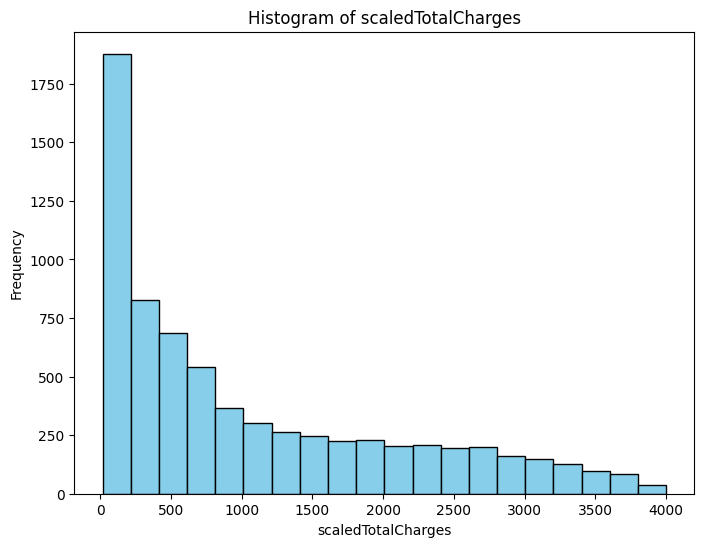

In [48]:
dv(df, 'scaledTotalCharges')

In [49]:
# Statistics on Scaled Total Charges
maximum_ScaledTC = df['scaledTotalCharges'].max()
minimum_ScaledTC = df['scaledTotalCharges'].min()
data_range_ScaledTC = maximum_ScaledTC - minimum_ScaledTC
average_ScaledTC = df['scaledTotalCharges'].mean()
std_deviation_ScaledTC = df['scaledTotalCharges'].std()
print(f"Maximum: {maximum_ScaledTC}")
print(f"Minimum: {minimum_ScaledTC}")
print(f"Range: {data_range_ScaledTC}")
print(f"Average: {average_ScaledTC}")
print(f"Standard Deviation: {std_deviation_ScaledTC}")

Maximum: 3999.9999999999995
Minimum: 18.0
Range: 3981.9999999999995
Average: 1058.9083923392525
Standard Deviation: 1041.666924728371


In [50]:
TotalCharges_Stats = df[['TotalCharges', 'scaledTotalCharges']].describe()
TotalCharges_Stats

,TotalCharges,scaledTotalCharges
count,7022.000000,7022.000000
mean,2284.121981,1058.908392
std,2266.972770,1041.666925
min,18.800000,18.000000
25%,401.350000,193.780533
50%,1397.950000,651.715128
75%,3799.837500,1755.374951
max,8684.800000,4000.000000


In [51]:
# Reordering the df to follow data matrix conventions
new_order_DM = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'scaledtenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaperlessBilling','AutomaticPayment', 'winsorized_MonthlyCharges',
       'scaledTotalCharges', 'Churn']
df_cleansed = df[new_order_DM]
df_cleansed.dtypes

gender                         int64
SeniorCitizen                  int64
Partner                        int64
Dependents                     int64
scaledtenure                 float64
PhoneService                   int64
MultipleLines                  int64
InternetService                int64
OnlineSecurity                 int64
OnlineBackup                   int64
DeviceProtection               int64
TechSupport                    int64
StreamingTV                    int64
StreamingMovies                int64
Contract_Month-to-month        uint8
Contract_One year              uint8
Contract_Two year              uint8
PaperlessBilling               int64
AutomaticPayment               int64
winsorized_MonthlyCharges    float64
scaledTotalCharges           float64
Churn                          int64
dtype: object

In [52]:
# Columns to convert to booleans
columns_to_convert = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'AutomaticPayment', 'Churn']

# Convert selected columns to booleans
df_cleansed[columns_to_convert] = df_cleansed[columns_to_convert].astype(bool)
df_cleansed.dtypes

<ipython-input-52-8ff441399b45>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleansed[columns_to_convert] = df_cleansed[columns_to_convert].astype(bool)


gender                          bool
SeniorCitizen                   bool
Partner                         bool
Dependents                      bool
scaledtenure                 float64
PhoneService                    bool
MultipleLines                   bool
InternetService                 bool
OnlineSecurity                  bool
OnlineBackup                    bool
DeviceProtection                bool
TechSupport                     bool
StreamingTV                     bool
StreamingMovies                 bool
Contract_Month-to-month        uint8
Contract_One year              uint8
Contract_Two year              uint8
PaperlessBilling                bool
AutomaticPayment                bool
winsorized_MonthlyCharges    float64
scaledTotalCharges           float64
Churn                           bool
dtype: object

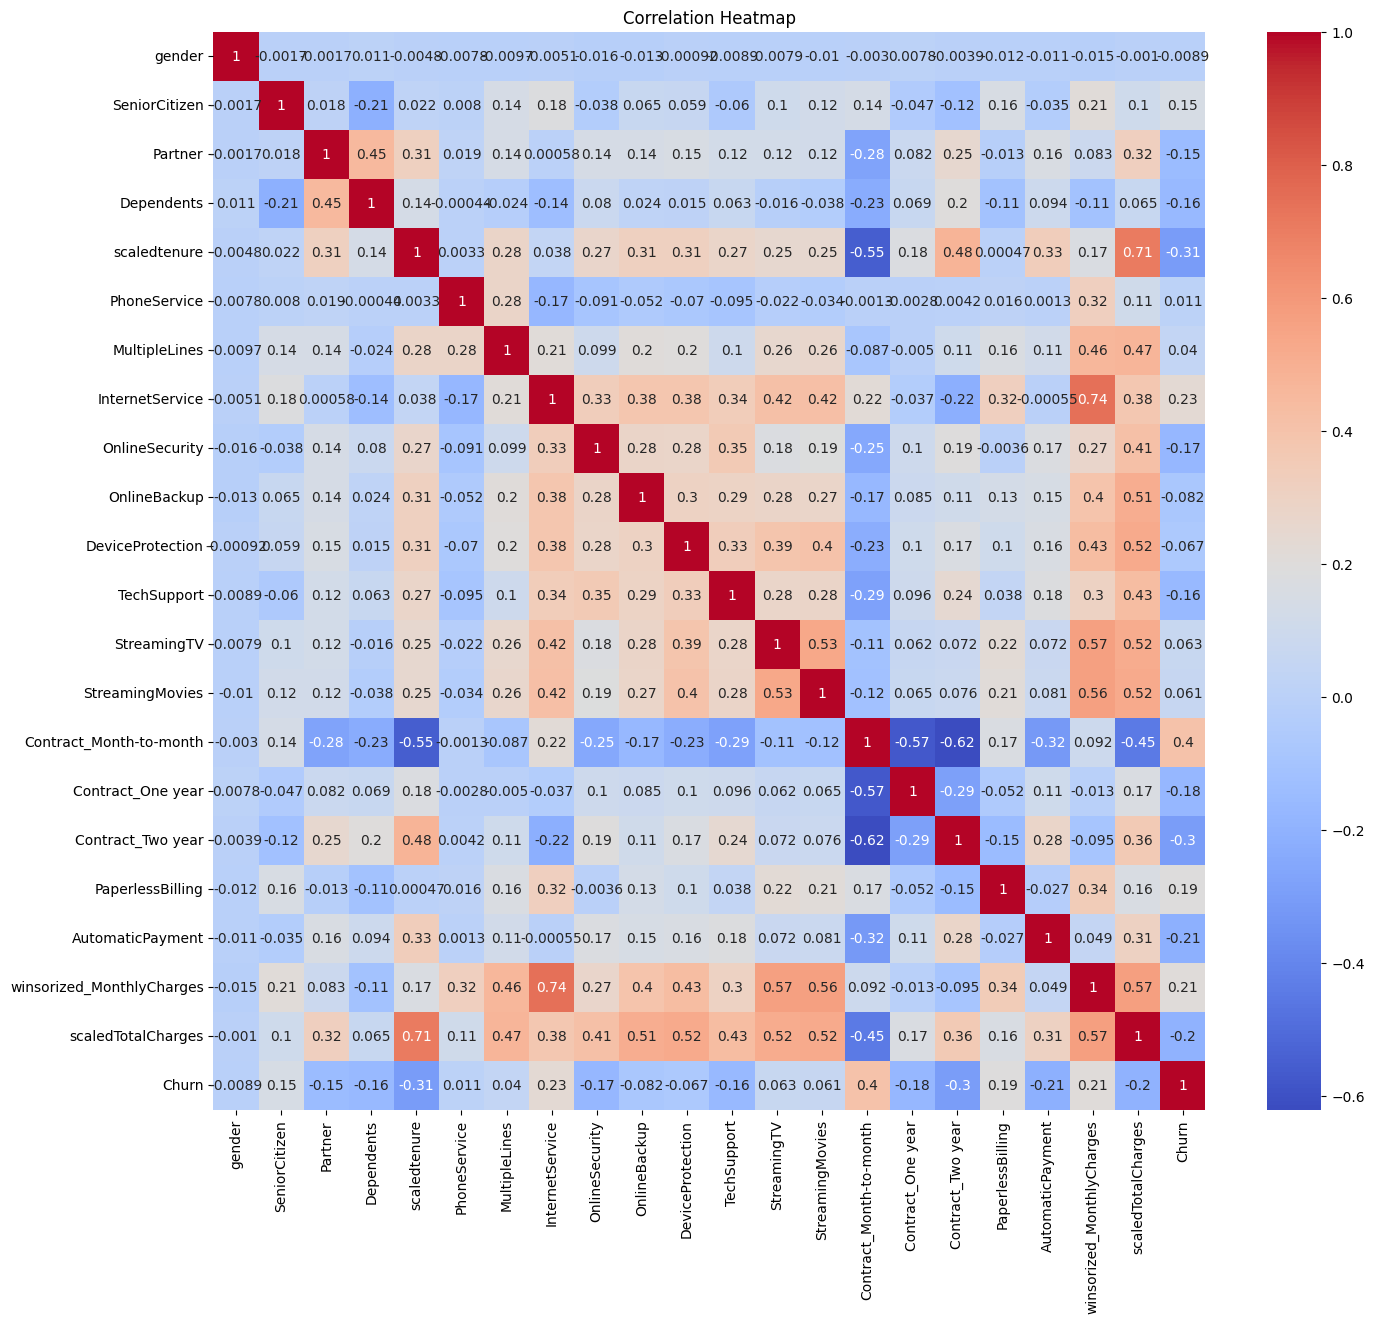

In [53]:
# plt.tight_layout()
plt.figure(figsize=(16, 14))
correlation_matrix = df_cleansed.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [54]:
df_cleansed.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'scaledtenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaperlessBilling', 'AutomaticPayment',
       'winsorized_MonthlyCharges', 'scaledTotalCharges', 'Churn'],
      dtype='object')

In [55]:
# Combine the 'Contract' columns into a single feature with the contract names
df_cleansed['ContractType'] = df[['Contract_Month-to-month', 'Contract_One year', 'Contract_Two year']].idxmax(axis=1)

# Replace the contract names with 0, 1, and 2
df_cleansed['ContractType'].replace({
    'Contract_Month-to-month': 0,
    'Contract_One year': 1,
    'Contract_Two year': 2
}, inplace=True)

print(df_cleansed[['ContractType']])

      ContractType
0                0
1                1
2                0
3                1
4                0
...            ...
7038             1
7039             1
7040             0
7041             0
7042             2

[7022 rows x 1 columns]


<ipython-input-55-8abfa8c0e45c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleansed['ContractType'] = df[['Contract_Month-to-month', 'Contract_One year', 'Contract_Two year']].idxmax(axis=1)
<ipython-input-55-8abfa8c0e45c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleansed['ContractType'].replace({


In [56]:
# Convert selected columns to booleans
df_cleansed['ContractType'] = df_cleansed['ContractType'].astype(bool)
df_cleansed.dtypes

<ipython-input-56-4dfde0e42067>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleansed['ContractType'] = df_cleansed['ContractType'].astype(bool)


gender                          bool
SeniorCitizen                   bool
Partner                         bool
Dependents                      bool
scaledtenure                 float64
PhoneService                    bool
MultipleLines                   bool
InternetService                 bool
OnlineSecurity                  bool
OnlineBackup                    bool
DeviceProtection                bool
TechSupport                     bool
StreamingTV                     bool
StreamingMovies                 bool
Contract_Month-to-month        uint8
Contract_One year              uint8
Contract_Two year              uint8
PaperlessBilling                bool
AutomaticPayment                bool
winsorized_MonthlyCharges    float64
scaledTotalCharges           float64
Churn                           bool
ContractType                    bool
dtype: object

In [57]:
# Combine 'Partner' and 'Dependents' into a single feature that indicates if a customer has any family ties.

df_cleansed['FamilyTies'] = df_cleansed.apply(lambda row: '1' if row['Partner'] == 1 or row['Dependents'] == 1 else '0', axis=1)

# Print the DataFrame
print(df_cleansed[['Partner','Dependents','FamilyTies']].head(20))

    Partner  Dependents FamilyTies
0      True       False          1
1     False       False          0
2     False       False          0
3     False       False          0
4     False       False          0
5     False       False          0
6     False        True          1
7     False       False          0
8      True       False          1
9     False        True          1
10     True        True          1
11    False       False          0
12     True       False          1
13    False       False          0
14    False       False          0
15     True        True          1
16    False       False          0
17    False        True          1
18     True        True          1
19    False       False          0


<ipython-input-57-7d81821ed475>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleansed['FamilyTies'] = df_cleansed.apply(lambda row: '1' if row['Partner'] == 1 or row['Dependents'] == 1 else '0', axis=1)


In [58]:
# Convert selected columns to booleans
df_cleansed['FamilyTies'] = df_cleansed['FamilyTies'].astype(bool)
df_cleansed.dtypes

<ipython-input-58-4112ceced0e1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleansed['FamilyTies'] = df_cleansed['FamilyTies'].astype(bool)


gender                          bool
SeniorCitizen                   bool
Partner                         bool
Dependents                      bool
scaledtenure                 float64
PhoneService                    bool
MultipleLines                   bool
InternetService                 bool
OnlineSecurity                  bool
OnlineBackup                    bool
DeviceProtection                bool
TechSupport                     bool
StreamingTV                     bool
StreamingMovies                 bool
Contract_Month-to-month        uint8
Contract_One year              uint8
Contract_Two year              uint8
PaperlessBilling                bool
AutomaticPayment                bool
winsorized_MonthlyCharges    float64
scaledTotalCharges           float64
Churn                           bool
ContractType                    bool
FamilyTies                      bool
dtype: object

In [59]:
print(df_cleansed['AutomaticPayment'])

0       False
1       False
2       False
3        True
4       False
        ...  
7038    False
7039     True
7040    False
7041    False
7042     True
Name: AutomaticPayment, Length: 7022, dtype: bool


In [60]:
# Define the conditions and category labels
conditions = [
    (df_cleansed['scaledtenure'] < 18),
    (df_cleansed['scaledtenure'] >= 18) & (df_cleansed['scaledtenure'] <= 72),
    (df_cleansed['scaledtenure'] > 72)
]

category_labels = ['New', 'Regular', 'Old']

# Use numpy.select to create the 'TenureCategory' column based on the conditions
df_cleansed['TenureCategory'] = np.select(conditions, category_labels, default='Unknown')

# Display the updated DataFrame
print(df_cleansed[['scaledtenure', 'TenureCategory']])

      scaledtenure TenureCategory
0        17.245714            New
1        20.640000        Regular
2        17.348571            New
3        21.771429        Regular
4        17.348571            New
...            ...            ...
7038     19.611429        Regular
7039     24.548571        Regular
7040     18.274286        Regular
7041     17.554286            New
7042     23.931429        Regular

[7022 rows x 2 columns]


<ipython-input-60-2e367ae4bc06>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleansed['TenureCategory'] = np.select(conditions, category_labels, default='Unknown')


In [61]:
# Checking how many unique values in column (there are three important values)
unique_values = df_cleansed['TenureCategory'].unique()
value_counts = df_cleansed['TenureCategory'].value_counts()

print(unique_values, value_counts)

['New' 'Regular' 'Old'] Regular    5298
New        1722
Old           2
Name: TenureCategory, dtype: int64


In [62]:
df_cleansed['TenureCategory'] = df_cleansed['TenureCategory'].replace({'Regular': '0', 'Old' : '0', 'New' : '1'})

<ipython-input-62-f7d94819f770>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleansed['TenureCategory'] = df_cleansed['TenureCategory'].replace({'Regular': '0', 'Old' : '0', 'New' : '1'})


In [63]:
# Convert selected columns to booleans
df_cleansed['TenureCategory'] = df_cleansed['TenureCategory'].astype(bool)
df_cleansed.dtypes

<ipython-input-63-2ed99d11cf77>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleansed['TenureCategory'] = df_cleansed['TenureCategory'].astype(bool)


gender                          bool
SeniorCitizen                   bool
Partner                         bool
Dependents                      bool
scaledtenure                 float64
PhoneService                    bool
MultipleLines                   bool
InternetService                 bool
OnlineSecurity                  bool
OnlineBackup                    bool
DeviceProtection                bool
TechSupport                     bool
StreamingTV                     bool
StreamingMovies                 bool
Contract_Month-to-month        uint8
Contract_One year              uint8
Contract_Two year              uint8
PaperlessBilling                bool
AutomaticPayment                bool
winsorized_MonthlyCharges    float64
scaledTotalCharges           float64
Churn                           bool
ContractType                    bool
FamilyTies                      bool
TenureCategory                  bool
dtype: object

In [64]:

# Define a function to categorize the level of internet service and security
def categorize_internet_security(row):
    # Check the 'InternetService' column and other related columns
    if row['InternetService'] == 0:
        return 0  # No Internet
    elif row['OnlineSecurity'] == 0 and row['OnlineBackup'] == 0 and row['DeviceProtection'] == 0 and row['TechSupport'] == 0:
        return 0  # Basic Internet
    else:
        return 1  # Premium Internet

# Apply the function to create a new column 'InternetSecurityLevel'
df_cleansed['InternetSecurityLevel'] = df.apply(categorize_internet_security, axis=1)

# Display the updated DataFrame
print(df_cleansed[['InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetSecurityLevel']])


      InternetService  OnlineSecurity  OnlineBackup  DeviceProtection  \
0                True           False          True             False   
1                True            True         False              True   
2                True            True          True             False   
3                True            True         False              True   
4                True           False         False             False   
...               ...             ...           ...               ...   
7038             True            True         False              True   
7039             True           False          True              True   
7040             True            True         False             False   
7041             True           False         False             False   
7042             True            True         False              True   

      TechSupport  InternetSecurityLevel  
0           False                      1  
1           False                    

In [65]:
print(df_cleansed[['InternetSecurityLevel']])


      InternetSecurityLevel
0                         1
1                         1
2                         1
3                         1
4                         0
...                     ...
7038                      1
7039                      1
7040                      1
7041                      0
7042                      1

[7022 rows x 1 columns]


In [66]:
# Checking how many unique values in column
unique_values = df_cleansed['InternetSecurityLevel'].unique()
value_counts = df_cleansed['InternetSecurityLevel'].value_counts()

print(unique_values, value_counts)

[1 0] 1    4237
0    2785
Name: InternetSecurityLevel, dtype: int64


In [67]:
# Convert selected columns to booleans
df_cleansed['InternetSecurityLevel'] = df_cleansed['InternetSecurityLevel'].astype(bool)
df_cleansed.dtypes

gender                          bool
SeniorCitizen                   bool
Partner                         bool
Dependents                      bool
scaledtenure                 float64
PhoneService                    bool
MultipleLines                   bool
InternetService                 bool
OnlineSecurity                  bool
OnlineBackup                    bool
DeviceProtection                bool
TechSupport                     bool
StreamingTV                     bool
StreamingMovies                 bool
Contract_Month-to-month        uint8
Contract_One year              uint8
Contract_Two year              uint8
PaperlessBilling                bool
AutomaticPayment                bool
winsorized_MonthlyCharges    float64
scaledTotalCharges           float64
Churn                           bool
ContractType                    bool
FamilyTies                      bool
TenureCategory                  bool
InternetSecurityLevel           bool
dtype: object

In [68]:
# Define a function to create interaction terms for each combination
# def create_interaction_term(row):
    #contract = row['ContractType']
    #internet_security = row['InternetSecurityLevel']
    #return f'Contract_{contract}_InternetSecurity_{internet_security}'

# Apply the function to create a new column for each interaction term
#df_cleansed['InteractionTerm'] = df_cleansed.apply(create_interaction_term, axis=1)

# Display the updated DataFrame
#print(df_cleansed[['ContractType', 'InternetSecurityLevel', 'InteractionTerm']])

In [69]:
# Checking how many unique values in column
#unique_values = df_cleansed['InteractionTerm'].unique()
#value_counts = df_cleansed['InteractionTerm'].value_counts()

#print(unique_values, value_counts)

In [70]:
df_cleansed.dtypes

gender                          bool
SeniorCitizen                   bool
Partner                         bool
Dependents                      bool
scaledtenure                 float64
PhoneService                    bool
MultipleLines                   bool
InternetService                 bool
OnlineSecurity                  bool
OnlineBackup                    bool
DeviceProtection                bool
TechSupport                     bool
StreamingTV                     bool
StreamingMovies                 bool
Contract_Month-to-month        uint8
Contract_One year              uint8
Contract_Two year              uint8
PaperlessBilling                bool
AutomaticPayment                bool
winsorized_MonthlyCharges    float64
scaledTotalCharges           float64
Churn                           bool
ContractType                    bool
FamilyTies                      bool
TenureCategory                  bool
InternetSecurityLevel           bool
dtype: object

In [71]:
# Reordering the df to follow data matrix conventions
neworderDM = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'scaledtenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaperlessBilling','AutomaticPayment', 'winsorized_MonthlyCharges',
       'scaledTotalCharges', 'ContractType', 'FamilyTies', 'TenureCategory', 'InternetSecurityLevel', 'Churn']
df_cleansed = df_cleansed[neworderDM]
df_cleansed.dtypes

gender                          bool
SeniorCitizen                   bool
Partner                         bool
Dependents                      bool
scaledtenure                 float64
PhoneService                    bool
MultipleLines                   bool
InternetService                 bool
OnlineSecurity                  bool
OnlineBackup                    bool
DeviceProtection                bool
TechSupport                     bool
StreamingTV                     bool
StreamingMovies                 bool
Contract_Month-to-month        uint8
Contract_One year              uint8
Contract_Two year              uint8
PaperlessBilling                bool
AutomaticPayment                bool
winsorized_MonthlyCharges    float64
scaledTotalCharges           float64
ContractType                    bool
FamilyTies                      bool
TenureCategory                  bool
InternetSecurityLevel           bool
Churn                           bool
dtype: object

In [72]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc


In [73]:
#get features for training the logistic regression
feature_list = df_cleansed.columns[:-1]
print(feature_list)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'scaledtenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaperlessBilling', 'AutomaticPayment',
       'winsorized_MonthlyCharges', 'scaledTotalCharges', 'ContractType',
       'FamilyTies', 'TenureCategory', 'InternetSecurityLevel'],
      dtype='object')


In [100]:
y = df_cleansed['Churn']
X = df_cleansed[feature_list]

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=1234)

In [102]:
print(X_train.shape)
print(X_test.shape)

(4704, 25)
(2318, 25)


In [103]:
# Calculate class weights EDIT
class_weight = len(y_train) / (2 * sum(y_train))

In [114]:
# Initialize and train the Gradient Boosting models with class weights
print('Begin GBDT Implementation with Class Weights...')

# GBDT with max_depth = 2
gbdt_2_model = GradientBoostingClassifier(n_estimators=50, max_depth=2, random_state=1234)
sample_weight_2 = np.where(y_train == 0, 1, class_weight)
gbdt_2_model.fit(X_train, y_train, sample_weight=sample_weight_2)
gbdt_2_predictions = gbdt_2_model.predict_proba(X_test)[:, 1]  # Get predicted probabilities

# GBDT with max_depth = 10
gbdt_10_model = GradientBoostingClassifier(n_estimators=50, max_depth=10, random_state=1234)
sample_weight_10 = np.where(y_train == 0, 1, class_weight)
gbdt_10_model.fit(X_train, y_train, sample_weight=sample_weight_10)
gbdt_10_predictions = gbdt_10_model.predict_proba(X_test)[:, 1]  # Get predicted probabilities

print('End')


Begin GBDT Implementation with Class Weights...
End


In [137]:
# compute roc to find optimal calssification threshold value
print('Computing ROC Curve...')
fpr_2, tpr_2, thresholds_2 = roc_curve(y_test, gbdt_2_predictions)
fpr_10, tpr_10, thresholds_10 = roc_curve(y_test, gbdt_10_predictions)
print('End')

Computing ROC Curve...
End


Plotting ROC Curve...


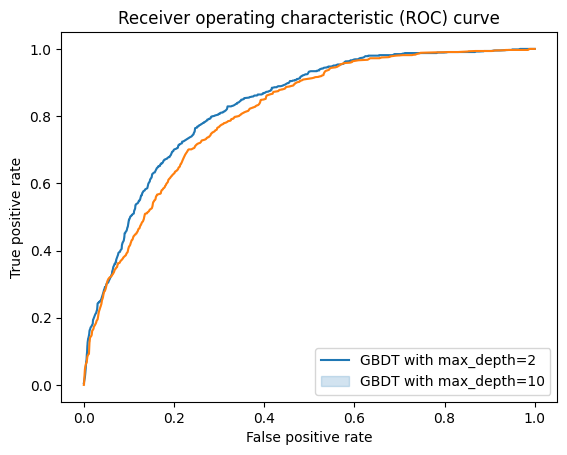

In [138]:
# finding best threshold value
print('Plotting ROC Curve...')

fig = plt.figure()
ax = fig.add_subplot(111)


sns.lineplot(x=fpr_2, y=tpr_2)
sns.lineplot(x=fpr_10, y=tpr_10)

plt.title("Receiver operating characteristic (ROC) curve")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.legend(['GBDT with max_depth=2', 'GBDT with max_depth=10'])
plt.show()

In [149]:
auc_2 = auc(fpr_2, tpr_2)

print("AUC of the GBDT model with a max depth of 2 is {:.3f}".format(auc_2))

auc_10 = auc(fpr_10, tpr_10)

print("AUC of the GBDT model with a max depth of 10 is {:.3f}".format(auc_10))

AUC of the GBDT model with a max depth of 2 is 0.830
AUC of the GBDT model with a max depth of 10 is 0.808


In [147]:
# Set your custom threshold
custom_threshold = 0.8

# Apply the threshold to make binary predictions for gbdt_2_model
gbdt_2_binary_predictions = (gbdt_2_predictions >= custom_threshold).astype(int)

# Apply the threshold to make binary predictions for gbdt_10_model
gbdt_10_binary_predictions = (gbdt_10_predictions >= custom_threshold).astype(int)


In [148]:
# Evaluate GBDT models with custom threshold

# Calculate evaluation metrics for gbdt_2_model
accuracy_2 = accuracy_score(y_test, gbdt_2_binary_predictions)
precision_2 = precision_score(y_test, gbdt_2_binary_predictions)
recall_2 = recall_score(y_test, gbdt_2_binary_predictions)
f1_2 = f1_score(y_test, gbdt_2_binary_predictions)
roc_auc_2 = roc_auc_score(y_test, gbdt_2_predictions)
confusion_matrix_2 = confusion_matrix(y_test, gbdt_2_binary_predictions)

# Calculate evaluation metrics for gbdt_10_model
accuracy_10 = accuracy_score(y_test, gbdt_10_binary_predictions)
precision_10 = precision_score(y_test, gbdt_10_binary_predictions)
recall_10 = recall_score(y_test, gbdt_10_binary_predictions)
f1_10 = f1_score(y_test, gbdt_10_binary_predictions)
roc_auc_10 = roc_auc_score(y_test, gbdt_10_predictions)
confusion_matrix_10 = confusion_matrix(y_test, gbdt_10_binary_predictions)

print("Metrics for gbdt_2_model with custom threshold:")
print(f"Accuracy: {accuracy_2}")
print(f"Precision: {precision_2}")
print(f"Recall: {recall_2}")
print(f"F1 Score: {f1_2}")
print(f"ROC AUC Score: {roc_auc_2}")
print(f"Confusion Matrix:\n{confusion_matrix_2}")

print("\nMetrics for gbdt_10_model with custom threshold:")
print(f"Accuracy: {accuracy_10}")
print(f"Precision: {precision_10}")
print(f"Recall: {recall_10}")
print(f"F1 Score: {f1_10}")
print(f"ROC AUC Score: {roc_auc_10}")
print(f"Confusion Matrix:\n{confusion_matrix_10}")

Metrics for gbdt_2_model with custom threshold:
Accuracy: 0.7553925798101812
Precision: 0.8306451612903226
Recall: 0.15870570107858242
F1 Score: 0.2664941785252264
ROC AUC Score: 0.8300967243701651
Confusion Matrix:
[[1648   21]
 [ 546  103]]

Metrics for gbdt_10_model with custom threshold:
Accuracy: 0.7670405522001725
Precision: 0.6752411575562701
Recall: 0.3235747303543914
F1 Score: 0.43750000000000006
ROC AUC Score: 0.8081008621827745
Confusion Matrix:
[[1568  101]
 [ 439  210]]
